In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Systems

Arrival: Entering a system </br>
Departure: Exiting a system </br>
Sojourn: Moving through a system

$$ q_A : Arrival Rate \\
q_D : Departure Rate \\
M : Pool Size \\
w : Sojourn Time
$$

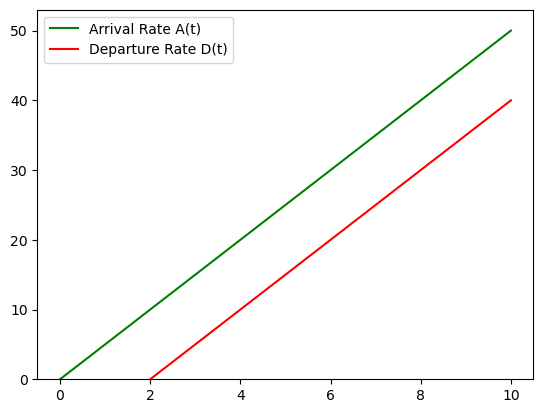

In [9]:
t = np.linspace(0,10)
m = 5
ba = 0
bd = 10
a = m*t+ba
d = m*t-bd
plt.plot(t,a,color='green',label='Arrival Rate A(t)')
plt.plot(t,d,color='red',label='Departure Rate D(t)')
plt.ylim(0)
plt.legend()

**A(t) gives cumulative arrivals of the vehicles in the road segment. </br>
D(t) on the other hand gives us the cumulative departures of the vehicles in the road.**

## Gate Questions

In [11]:
def gate(A,D,mu,Aprime):
    if A>D:
        return mu
    elif A==D:
        return min(mu,Aprime)
    
#A is the arrival rate 
#D is the departure rate
#mu is the capacity

## Cumulative Diagram Practice

In [19]:
df = pd.read_excel('datasets/vertical_queue.xlsx')
df = df.set_index('Time')
df

,Arrival,Departure
Time,,
0,0,0
2,12,12
4,30,24
6,48,36
8,54,48
10,60,60
12,66,66
14,90,78
16,90,90


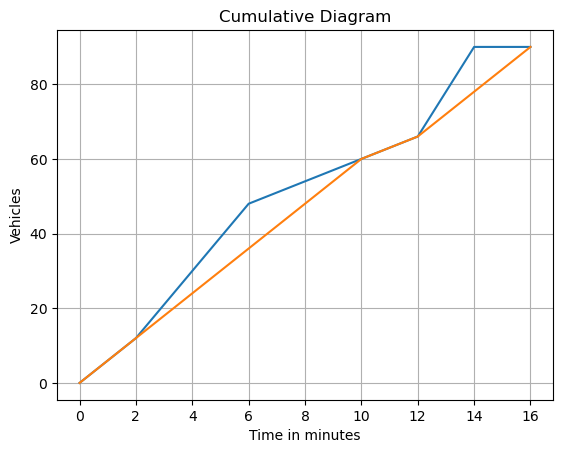

In [23]:
plt.grid()
plt.title('Cumulative Diagram')
plt.xlabel('Time in minutes')
plt.ylabel('Vehicles')
plt.plot(df)